In [1]:
import tensorflow
from tensorflow import keras
from keras import models
from keras import Sequential
from keras.layers import Dense,Flatten, Dropout
from keras.applications.vgg16 import VGG16

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
vgg_base = VGG16(weights='imagenet',    # use weights for ImageNet
                 include_top=False,     # drop the Dense layers!
                 input_shape=(300, 300, 3))
print(vgg_base.summary())

58889256/58889256 [==============================] - 2s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 300, 300, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 300, 300, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 300, 300, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 150, 150, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 150, 150, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 150, 150, 128)     147584    
                                                              

In [4]:
model = Sequential([
        # our vgg16_base model added as a layer
        vgg_base,
        # here is our custom prediction layer
        Flatten(),
        Dropout(0.50),
        Dense(1024, activation='relu'),
        Dropout(0.20),
        Dense(512, activation='relu'),
        Dropout(0.10),
        Dense(1, activation='sigmoid')
    ])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 9, 9, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 41472)             0         
                                                                 
 dropout (Dropout)           (None, 41472)             0         
                                                                 
 dense (Dense)               (None, 1024)              42468352  
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0

In [6]:
vgg_base.trainable = False

In [7]:
import zipfile
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/ai_resized.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [8]:
import zipfile
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/real_resized.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [9]:
import zipfile
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/real_test.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [10]:
import zipfile
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/Real.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [11]:
import zipfile
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/ai_test.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [12]:
import zipfile
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/AI generated.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [13]:
import os
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

In [14]:
train_dir = "/content/train"
test_dir = "/content/test"
eval_dir = "/content/eval"

In [15]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [16]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [17]:
eval_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

In [18]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(300,300),
    batch_size=32,
    class_mode='binary')

Found 13550 images belonging to 2 classes.


In [19]:
eval_generator = eval_datagen.flow_from_directory(
    eval_dir,
    target_size=(300,300),
    batch_size=32,
    class_mode='binary')

Found 2000 images belonging to 2 classes.


In [20]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(300,300),
    batch_size=32,
    class_mode='binary')

Found 640 images belonging to 2 classes.


In [21]:
train_steps = train_generator.n // 32
eval_steps = eval_generator.n // 32
test_steps = test_generator.n // 32

In [23]:
checkpoint_path = "/content/drive/MyDrive/checkpoints/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)


In [24]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_steps,
    epochs=43,
    validation_data=eval_generator,
    validation_steps=eval_steps,callbacks=[cp_callback])

Epoch 1/43
423/423 [==============================] - ETA: 0s - loss: 0.6162 - accuracy: 0.7296
Epoch 1: saving model to /content/drive/MyDrive/checkpoints/cp.ckpt
423/423 [==============================] - 366s 865ms/step - loss: 0.6162 - accuracy: 0.7296 - val_loss: 0.4409 - val_accuracy: 0.7989
Epoch 2/43
423/423 [==============================] - ETA: 0s - loss: 0.4615 - accuracy: 0.7818
Epoch 2: saving model to /content/drive/MyDrive/checkpoints/cp.ckpt
423/423 [==============================] - 359s 849ms/step - loss: 0.4615 - accuracy: 0.7818 - val_loss: 0.3662 - val_accuracy: 0.8392
Epoch 3/43
423/423 [==============================] - ETA: 0s - loss: 0.4454 - accuracy: 0.7921
Epoch 3: saving model to /content/drive/MyDrive/checkpoints/cp.ckpt
423/423 [==============================] - 356s 842ms/step - loss: 0.4454 - accuracy: 0.7921 - val_loss: 0.4337 - val_accuracy: 0.7913
Epoch 4/43
423/423 [==============================] - ETA: 0s - loss: 0.4238 - accuracy: 0.8020
Epoch 4

In [25]:
model.save('my_model.keras')

In [26]:
model.save('/content/drive/MyDrive/image_classify.keras')

In [27]:
loss, acc = model.evaluate(train_generator,
                     steps=train_steps, verbose=1)
print('Training data  -> loss: %.3f, acc: %.3f' % (loss, acc))
loss, acc = model.evaluate(eval_generator,
                     steps=eval_steps, verbose=1)
print('Cross-val data -> loss: %.3f, acc: %.3f' % (loss, acc))
loss, acc = model.evaluate(test_generator,
                      steps=test_steps, verbose=1)
print('Testing data   -> loss: %.3f, acc: %.3f' % (loss, acc))

423/423 [==============================] - 322s 760ms/step - loss: 0.3042 - accuracy: 0.8744
Training data  -> loss: 0.304, acc: 0.874
62/62 [==============================] - 14s 219ms/step - loss: 0.2596 - accuracy: 0.9057
Cross-val data -> loss: 0.260, acc: 0.906
20/20 [==============================] - 5s 226ms/step - loss: 0.4725 - accuracy: 0.8062
Testing data   -> loss: 0.473, acc: 0.806


In [28]:
model.save('/content/drive/MyDrive/my_model.h5')

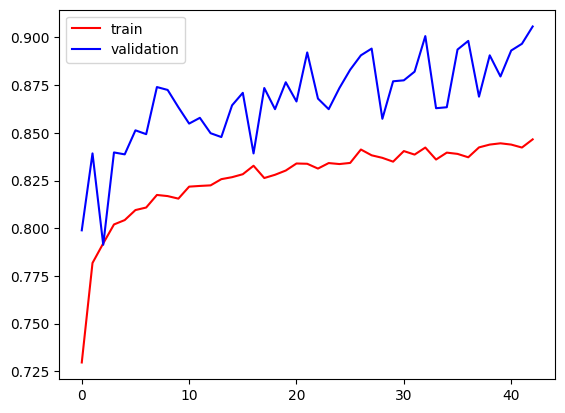

In [29]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

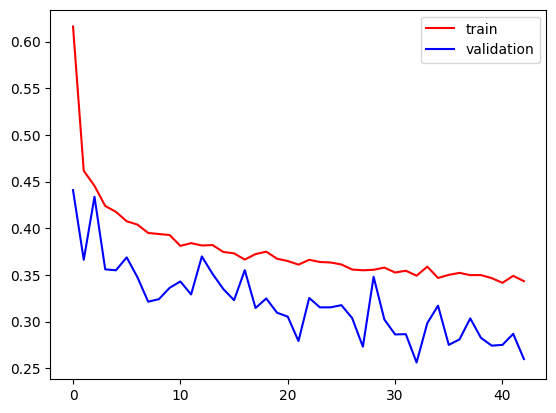

In [30]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()